### in this notebook we'll create a single_neuron network with a custom loss function. we'll go step by step, outputting the results after each step. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

define an arbitrary function that we'll use to generate data. in the end we'll check how close to the function coefficientts the NN gets its weights

In [5]:
def func(x1,x2):
    y = 5*x1 + 3*x2
    return y

number of rows in the dataset

In [174]:
nrows = 100

In [175]:
x1arr = np.random.rand(nrows)
x1arr

array([0.81534462, 0.49955622, 0.69456792, 0.50705459, 0.5398366 ,
       0.58240225, 0.14875995, 0.07399039, 0.94558245, 0.00919165,
       0.18205665, 0.1061379 , 0.74680208, 0.57454448, 0.11077778,
       0.21761422, 0.49633702, 0.8216248 , 0.42434738, 0.92986667,
       0.64429287, 0.95057637, 0.19433801, 0.62663603, 0.91691396,
       0.3322662 , 0.13408667, 0.73090512, 0.46316743, 0.24858618,
       0.26290484, 0.11544678, 0.37787004, 0.75920178, 0.71786311,
       0.93009194, 0.45619767, 0.74295896, 0.83462565, 0.10563704,
       0.38440778, 0.30321812, 0.13331666, 0.38870047, 0.47351865,
       0.89086494, 0.90407217, 0.52082121, 0.03553587, 0.33223119,
       0.64347915, 0.86310123, 0.75375361, 0.11712282, 0.71825023,
       0.57215677, 0.87973428, 0.73695596, 0.82160106, 0.74249423,
       0.53887171, 0.36526908, 0.5529916 , 0.25251697, 0.87165433,
       0.30813568, 0.35887374, 0.29096892, 0.66495103, 0.38217495,
       0.34098144, 0.54656277, 0.2595699 , 0.13884609, 0.25000

In [176]:
x2arr = np.random.randn(nrows)
x2arr

array([-4.59017301e-01,  1.72656951e+00,  1.19934794e+00, -1.49352020e+00,
        7.12163681e-01,  2.30532847e-01, -1.55135702e+00, -3.35746372e-01,
       -1.64711583e+00,  2.82287413e-01,  1.40058587e+00,  1.11824431e-01,
       -4.02722093e-01,  6.24505800e-01, -1.26381390e+00,  2.92415063e-01,
        4.03070764e-02, -6.37592870e-01,  7.25868000e-01,  5.74114630e-01,
        8.49465723e-01,  1.33197926e-01,  8.85118571e-01, -9.91423063e-02,
        2.29442839e-01, -5.55154271e-01,  2.16369399e+00,  2.00099172e-01,
       -1.56659401e+00, -1.00739971e+00, -1.17624996e+00,  1.48432238e+00,
        1.19117999e+00, -2.89577393e-01,  3.75743641e-01, -6.74020081e-02,
       -1.13252314e+00, -1.32916862e+00, -1.03352401e+00,  8.01427688e-01,
        1.40842977e+00,  1.32077815e+00,  9.60352520e-01,  6.15367681e-02,
       -8.08288590e-02, -1.68539292e-01, -1.12445995e+00, -2.94565137e-01,
        1.36647128e+00, -5.70241292e-01,  1.45143542e+00, -4.14015320e-01,
       -7.12450702e-01, -

create the output using the created function

In [177]:
yarr = np.zeros_like(x1arr)
for i,(x1,x2) in enumerate(zip(x1arr, x2arr)):
    yarr[i] = func(x1,x2)

In [24]:
yarr

array([ 7.05580386,  0.95599103,  5.33119825, -0.74198584,  6.18558445,
        6.48721223,  2.24316689, 10.29898096,  5.98724465,  2.06185834,
        9.01858031,  4.32810202,  3.14609199,  6.88349181,  3.68338451,
        3.31964508, -3.38943575,  6.47126393, -1.03578526,  3.89706315,
        1.80533249, -4.48382914,  3.14640127, -1.19440913,  2.07809369,
        7.54806402,  4.7037127 ,  6.42769165,  1.95928744,  4.18468845,
        0.83000561,  1.25144509,  8.33504914,  3.2967325 , -0.92148156,
        0.9262348 , -0.6405097 ,  8.41903402,  5.21239785, -3.90567862,
        5.3527675 ,  1.94055432,  5.21323696,  1.35834042, -4.49454612,
        3.05559092,  7.69675185,  1.83882598, -5.65303102,  1.83588082,
        5.2362807 ,  1.67311993,  4.25541083, -1.77206102, -0.55300077,
        5.86978602,  3.48314128,  2.74946079,  0.3985191 ,  0.64082019,
       -4.28970557,  8.66781902,  6.8797371 ,  2.02120211,  3.09153854,
        8.10312273, -1.63230315,  3.52023172, -4.94749656,  8.09

In [25]:
import torch
import torch.nn as nn

define a single neuron NN without a non-linearity

In [44]:
class OneNeuron(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.fc1 = nn.Linear(num_features, 1)
        
    def forward(self, x):
        # let's try without a non-linearity
        x = self.fc1(x)
        
        return x
        

prepare the feature and label data. This is a regression problem (not classification)

In [180]:
num_features = 2

In [247]:
inp_features = [[xa,xb] for xa,xb in zip(x1arr, x2arr)]
inp_features

[[0.8153446157529374, -0.45901730054562095],
 [0.4995562227825683, 1.7265695072083662],
 [0.6945679189093344, 1.1993479421992954],
 [0.5070545941068564, -1.4935202006415427],
 [0.5398366047672223, 0.712163680740457],
 [0.5824022482374285, 0.23053284675770438],
 [0.14875994629297984, -1.551357015018501],
 [0.07399038876207376, -0.33574637161444476],
 [0.9455824461815371, -1.6471158341897818],
 [0.009191652177269583, 0.28228741290593],
 [0.18205664908785724, 1.4005858653455603],
 [0.10613789838313925, 0.1118244311233667],
 [0.7468020849871758, -0.40272209258327896],
 [0.5745444803544822, 0.6245058000945735],
 [0.11077778355169332, -1.2638139017940402],
 [0.21761422369716943, 0.2924150626623975],
 [0.4963370200663426, 0.04030707636943772],
 [0.8216247958968887, -0.6375928704091026],
 [0.42434737889561625, 0.7258679995017046],
 [0.9298666666809082, 0.5741146300534784],
 [0.6442928711127079, 0.8494657226217759],
 [0.9505763651084937, 0.13319792566598662],
 [0.1943380061621458, 0.88511857054

In [248]:
inp_feat_tensor = torch.tensor(inp_features, dtype=torch.float32)
inp_feat_tensor

tensor([[ 8.1534e-01, -4.5902e-01],
        [ 4.9956e-01,  1.7266e+00],
        [ 6.9457e-01,  1.1993e+00],
        [ 5.0705e-01, -1.4935e+00],
        [ 5.3984e-01,  7.1216e-01],
        [ 5.8240e-01,  2.3053e-01],
        [ 1.4876e-01, -1.5514e+00],
        [ 7.3990e-02, -3.3575e-01],
        [ 9.4558e-01, -1.6471e+00],
        [ 9.1917e-03,  2.8229e-01],
        [ 1.8206e-01,  1.4006e+00],
        [ 1.0614e-01,  1.1182e-01],
        [ 7.4680e-01, -4.0272e-01],
        [ 5.7454e-01,  6.2451e-01],
        [ 1.1078e-01, -1.2638e+00],
        [ 2.1761e-01,  2.9242e-01],
        [ 4.9634e-01,  4.0307e-02],
        [ 8.2162e-01, -6.3759e-01],
        [ 4.2435e-01,  7.2587e-01],
        [ 9.2987e-01,  5.7411e-01],
        [ 6.4429e-01,  8.4947e-01],
        [ 9.5058e-01,  1.3320e-01],
        [ 1.9434e-01,  8.8512e-01],
        [ 6.2664e-01, -9.9142e-02],
        [ 9.1691e-01,  2.2944e-01],
        [ 3.3227e-01, -5.5515e-01],
        [ 1.3409e-01,  2.1637e+00],
        [ 7.3091e-01,  2.001

In [249]:
ytensor = torch.tensor(yarr, dtype=torch.float32)
ytensor

tensor([ 2.6997e+00,  7.6775e+00,  7.0709e+00, -1.9453e+00,  4.8357e+00,
         3.6036e+00, -3.9103e+00, -6.3729e-01, -2.1344e-01,  8.9282e-01,
         5.1120e+00,  8.6616e-01,  2.5258e+00,  4.7462e+00, -3.2376e+00,
         1.9653e+00,  2.6026e+00,  2.1953e+00,  4.2993e+00,  6.3717e+00,
         5.7699e+00,  5.1525e+00,  3.6270e+00,  2.8358e+00,  5.2729e+00,
        -4.1318e-03,  7.1615e+00,  4.2548e+00, -2.3839e+00, -1.7793e+00,
        -2.2142e+00,  5.0302e+00,  5.4629e+00,  2.9273e+00,  4.7165e+00,
         4.4483e+00, -1.1166e+00, -2.7271e-01,  1.0726e+00,  2.9325e+00,
         6.1473e+00,  5.4784e+00,  3.5476e+00,  2.1281e+00,  2.1251e+00,
         3.9487e+00,  1.1470e+00,  1.7204e+00,  4.2771e+00, -4.9568e-02,
         7.5717e+00,  3.0735e+00,  1.6314e+00, -2.1205e+00,  3.7786e+00,
         7.6248e+00,  6.1241e+00,  8.5263e+00,  2.0927e+00,  6.5276e-01,
         9.1525e-01,  4.0370e+00, -3.0907e+00,  2.9483e+00,  5.8717e+00,
        -4.8819e+00,  8.9095e+00, -8.0983e-01,  4.7

instantiate the model

In [250]:
model1 = OneNeuron(num_features)

In [251]:
model1

OneNeuron(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

In [252]:
model1.parameters()

<generator object Module.parameters at 0x7f3c819f7580>

In [253]:
optimizer = torch.optim.Adam(model1.parameters())

In [254]:
model1.fc1.weight

Parameter containing:
tensor([[ 0.6598, -0.3005]], requires_grad=True)

make one forward pass

In [255]:
yhat = model1(inp_feat_tensor)
yhat

tensor([[ 0.1472],
        [-0.7179],
        [-0.4308],
        [ 0.2546],
        [-0.3865],
        [-0.2137],
        [ 0.0356],
        [-0.3790],
        [ 0.5901],
        [-0.6075],
        [-0.8295],
        [-0.4923],
        [ 0.0850],
        [-0.3373],
        [-0.0759],
        [-0.4730],
        [-0.2133],
        [ 0.2050],
        [-0.4669],
        [-0.0877],
        [-0.3589],
        [ 0.0585],
        [-0.6665],
        [-0.0855],
        [ 0.0073],
        [-0.1427],
        [-1.0904],
        [-0.1066],
        [ 0.2476],
        [-0.0620],
        [-0.0018],
        [-0.8986],
        [-0.6374],
        [ 0.0592],
        [-0.1680],
        [ 0.1052],
        [ 0.1126],
        [ 0.3609],
        [ 0.3325],
        [-0.6999],
        [-0.6983],
        [-0.7256],
        [-0.7293],
        [-0.2907],
        [-0.1920],
        [ 0.1097],
        [ 0.4057],
        [-0.0966],
        [-0.9159],
        [-0.1382],
        [-0.5403],
        [ 0.1652],
        [ 0.

In [256]:
ytensor.shape

torch.Size([100])

In [257]:
yhat.shape

torch.Size([100, 1])

In [258]:
ytensor.unsqueeze(1).shape

torch.Size([100, 1])

In [259]:
(ytensor.unsqueeze(1) - yhat)**2

tensor([[6.5152e+00],
        [7.0483e+01],
        [5.6276e+01],
        [4.8397e+00],
        [2.7272e+01],
        [1.4572e+01],
        [1.5570e+01],
        [6.6706e-02],
        [6.4574e-01],
        [2.2509e+00],
        [3.5302e+01],
        [1.8454e+00],
        [5.9575e+00],
        [2.5842e+01],
        [9.9963e+00],
        [5.9454e+00],
        [7.9296e+00],
        [3.9615e+00],
        [2.2717e+01],
        [4.1724e+01],
        [3.7561e+01],
        [2.5949e+01],
        [1.8434e+01],
        [8.5336e+00],
        [2.7726e+01],
        [1.9192e-02],
        [6.8095e+01],
        [1.9022e+01],
        [6.9253e+00],
        [2.9491e+00],
        [4.8949e+00],
        [3.5151e+01],
        [3.7213e+01],
        [8.2257e+00],
        [2.3859e+01],
        [1.8862e+01],
        [1.5109e+00],
        [4.0147e-01],
        [5.4761e-01],
        [1.3194e+01],
        [4.6863e+01],
        [3.8489e+01],
        [1.8293e+01],
        [5.8509e+00],
        [5.3690e+00],
        [1

In [260]:
torch.mean((ytensor.unsqueeze(1) - yhat)**2)

tensor(22.6475, grad_fn=<MeanBackward0>)

calculate the loss

In [261]:
loss = torch.mean((ytensor.unsqueeze(1) - yhat)**2)
loss

tensor(22.6475, grad_fn=<MeanBackward0>)

make one backward pass

In [262]:
loss.backward()

check the weights and the gradients

In [263]:
model1.fc1.weight

Parameter containing:
tensor([[ 0.6598, -0.3005]], requires_grad=True)

In [264]:
model1.fc1.weight.grad

tensor([[-3.6511, -7.9056]])

now update the weights and check them again

In [265]:
optimizer.step()

In [266]:
model1.fc1.weight

Parameter containing:
tensor([[ 0.6608, -0.2995]], requires_grad=True)

the weights were updated. now zero the gradients and repeat the process

In [267]:
optimizer.zero_grad()

In [268]:
model1.fc1.weight.grad

tensor([[0., 0.]])

let's repeat the process a few times, keeping track of the loss and weights

In [269]:
epochs = 10000

In [270]:
model1.fc1.weight.detach().numpy().squeeze()[1]

-0.29950166

In [271]:
running_w1 = []
running_w2 = []
running_loss = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model1(inp_feat_tensor)
    loss = torch.mean((ytensor.unsqueeze(1) - output)**2)
    
    w1 = model1.fc1.weight.detach().numpy().squeeze()[0]
    w2 = model1.fc1.weight.detach().numpy().squeeze()[1]
    running_loss.append(loss.item())
    running_w1.append(w1)
    running_w2.append(w2)
    
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:    
        print(f'epoch: {i}- loss: {loss}, w1: {w1}, w2: {w2}')
    

epoch: 0- loss: 22.629596710205078, w1: 0.6608117818832397, w2: -0.2995016574859619
epoch: 100- loss: 20.890830993652344, w1: 0.7599672675132751, w2: -0.20007453858852386
epoch: 200- loss: 19.260774612426758, w1: 0.8567955493927002, w2: -0.10221785306930542
epoch: 300- loss: 17.735261917114258, w1: 0.9512518048286438, w2: -0.005948343314230442
epoch: 400- loss: 16.309301376342773, w1: 1.0433505773544312, w2: 0.08875961601734161
epoch: 500- loss: 14.978100776672363, w1: 1.1331051588058472, w2: 0.18192964792251587
epoch: 600- loss: 13.737044334411621, w1: 1.220523715019226, w2: 0.27358347177505493
epoch: 700- loss: 12.581695556640625, w1: 1.3056132793426514, w2: 0.36374062299728394
epoch: 800- loss: 11.507768630981445, w1: 1.388376235961914, w2: 0.4524190425872803
epoch: 900- loss: 10.511129379272461, w1: 1.4688127040863037, w2: 0.5396342277526855
epoch: 1000- loss: 9.587778091430664, w1: 1.5469204187393188, w2: 0.6254000663757324
epoch: 1100- loss: 8.733840942382812, w1: 1.6226948499679

Text(0.5, 1.0, 'loss vs epochs')

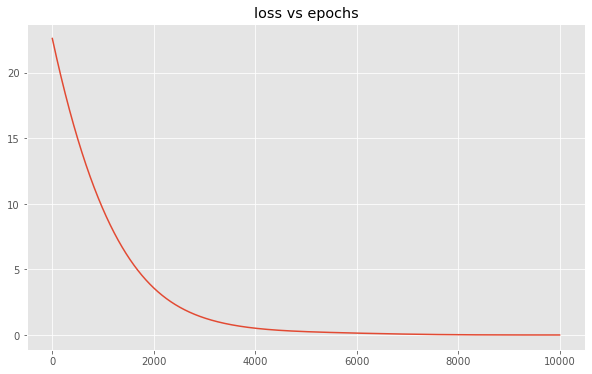

In [273]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_loss)
plt.title('loss vs epochs')

Text(0.5, 1.0, 'w1 over epochs. true w1 = 5')

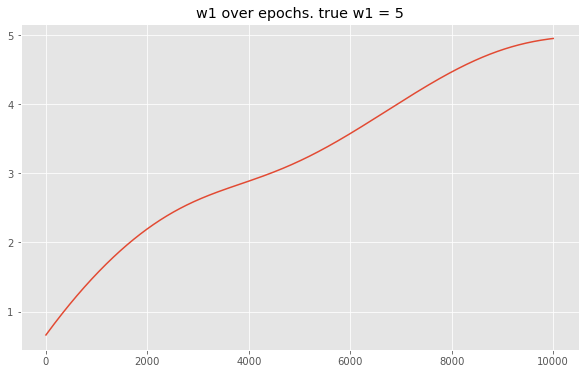

In [275]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w1)
plt.title('w1 over epochs. true w1 = 5')

Text(0.5, 1.0, 'w2 over epochs. true w2 = 3')

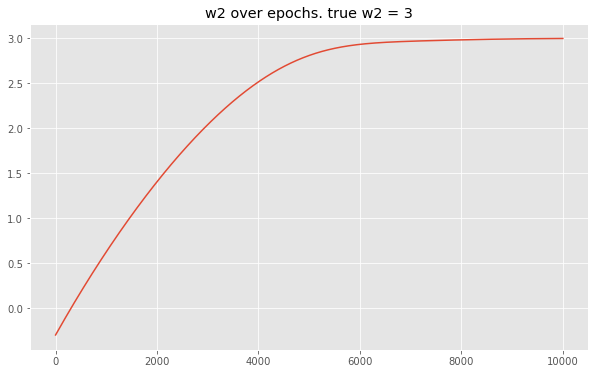

In [276]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w2)
plt.title('w2 over epochs. true w2 = 3')

### inference

as we can see, it took around 6000 epochs to get the loss down to an acceptable level. as the function was linear, it took only one neuron to approximate it.